#Company Bankruptcy Prediction









Connecting Google Colab to Kaggle to get Dataset directly to colab

In [ ]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle_datasets/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d fedesoriano/company-bankruptcy-prediction

Downloading the helper functions designed by mrdbourke which contains custom functions

In [ ]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

Installing required library for EDA process

In [ ]:
!pip install klib

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
!pip install sweetviz

Importing required functions from helper functions


In [1]:
from helper_functions import unzip_data, plot_loss_curves, make_confusion_matrix, accuracy_score,calculate_results

unziping the dataset

In [2]:
unzip_data("company-bankruptcy-prediction.zip")

Importing required libraries

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns
import klib
import sweetviz as sv

importing the dataset

In [4]:
df = pd.read_csv("data.csv")

Viewing first 5 rows of the dataset

In [5]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


#Part 1 : Exploratory Data Analysis

In [6]:
df_clean = klib.data_cleaning(df)

Long column names detected (>25 characters). Consider renaming the following columns ['roa_c_before_interest_and_depreciation_before_interest', 'roa_a_before_interest_and_percent_after_tax', 'roa_b_before_interest_and_depreciation_after_tax', 'realized_sales_gross_margin', 'after_tax_net_interest_rate', 'non_industry_income_and_expenditure_revenue', 'continuous_interest_rate_after_tax', 'research_and_development_expense_rate', 'interest_bearing_debt_interest_rate', 'persistent_eps_in_the_last_four_seasons', 'operating_profit_per_share_yuan_¥', 'per_share_net_profit_before_tax_yuan_¥', 'realized_sales_gross_profit_growth_rate', 'operating_profit_growth_rate', 'after_tax_net_profit_growth_rate', 'regular_net_profit_growth_rate', 'continuous_net_profit_growth_rate', 'total_asset_return_growth_rate_ratio', 'total_debt_total_net_worth', 'long_term_fund_suitability_ratio_a', 'contingent_liabilities_net_worth', 'operating_profit_paid_in_capital', 'net_profit_before_tax_paid_in_capital', 'inve

Note: The number of non binary numerical features is very large (93), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:959: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:179: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:959: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:179: RuntimeWarning:

overflow encountered in reduce



<AxesSubplot: xlabel='cash_flow_per_share', ylabel='Density'>

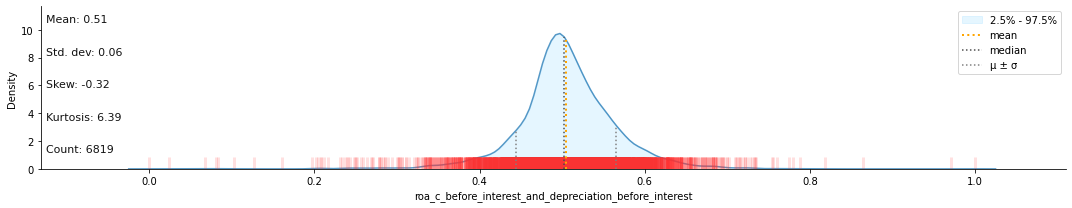

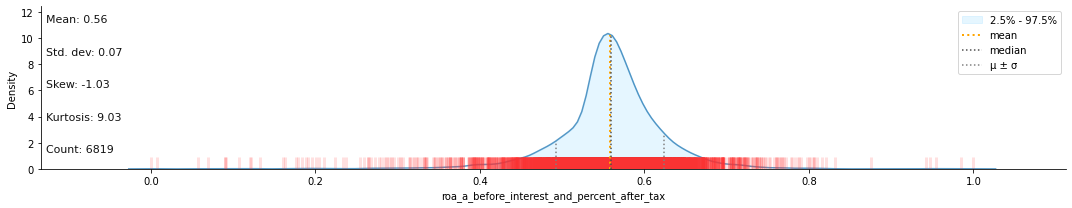

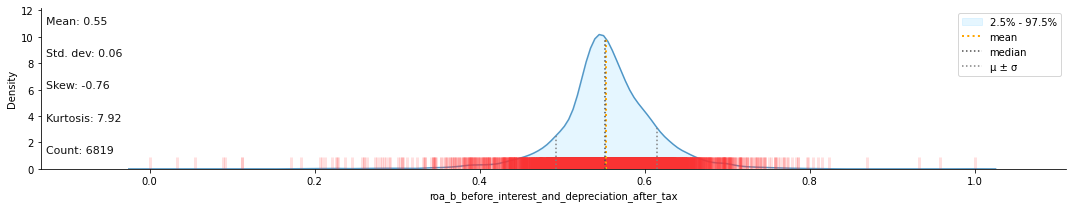

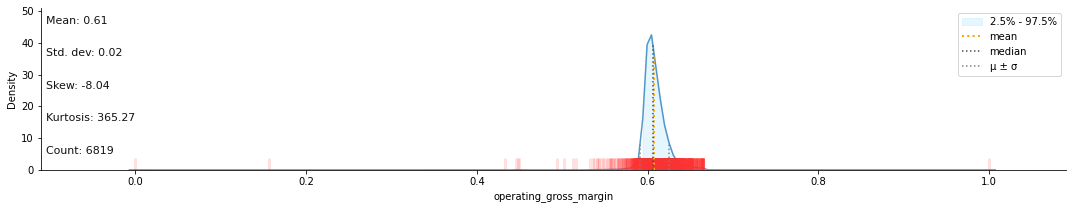

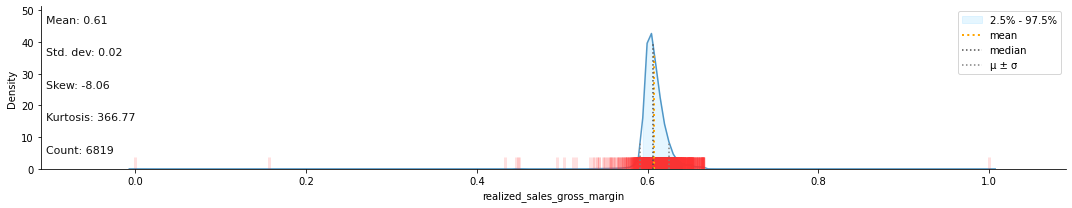

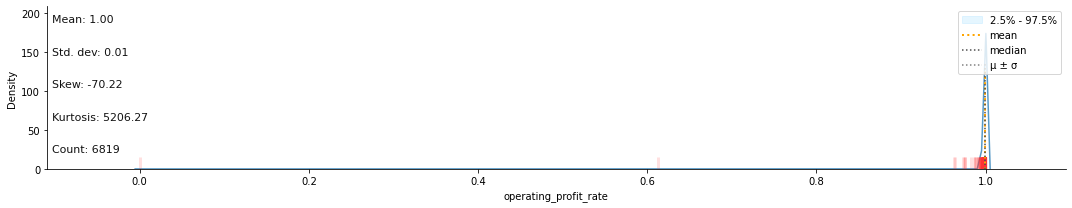

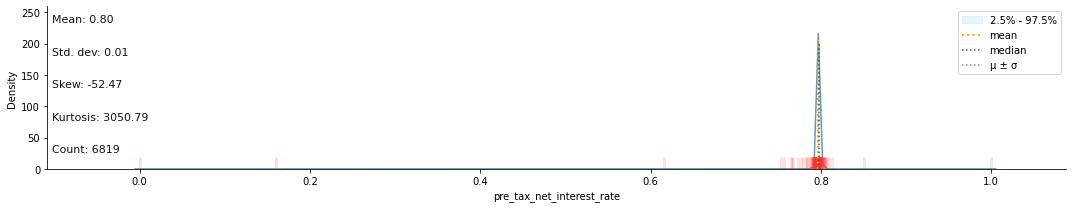

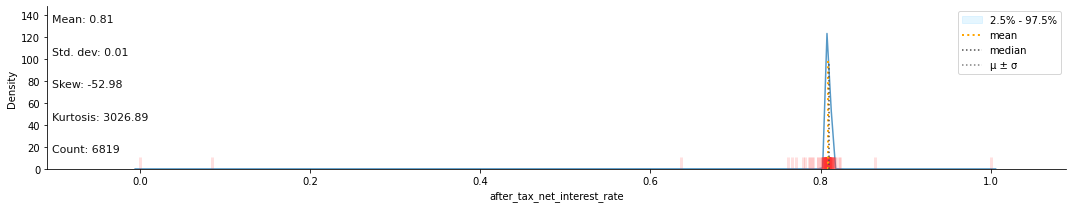

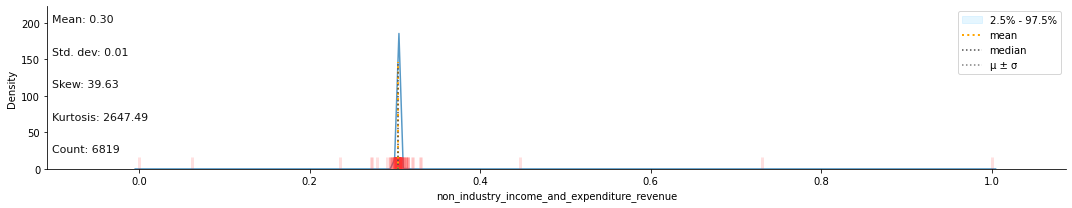

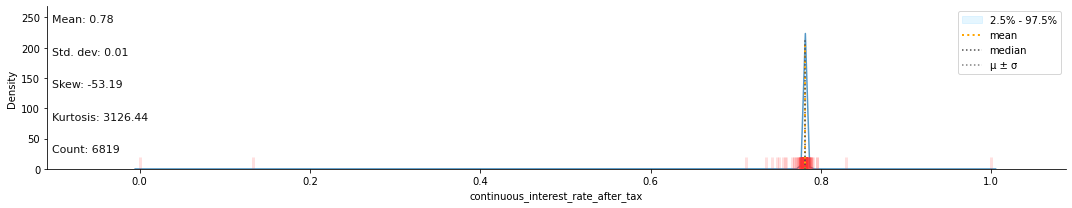

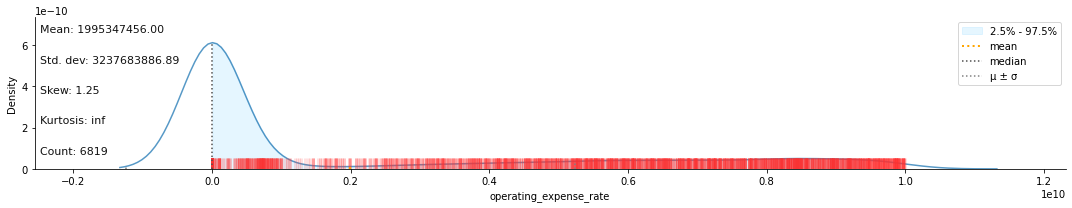

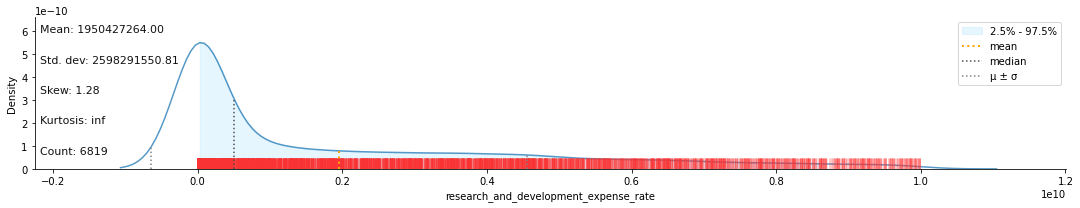

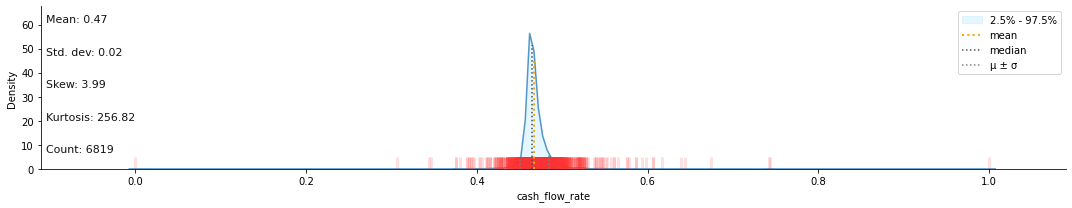

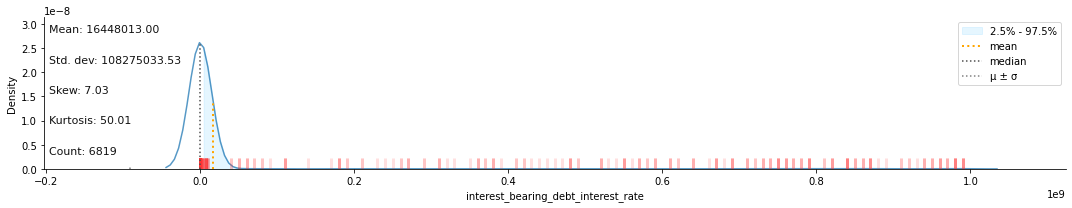

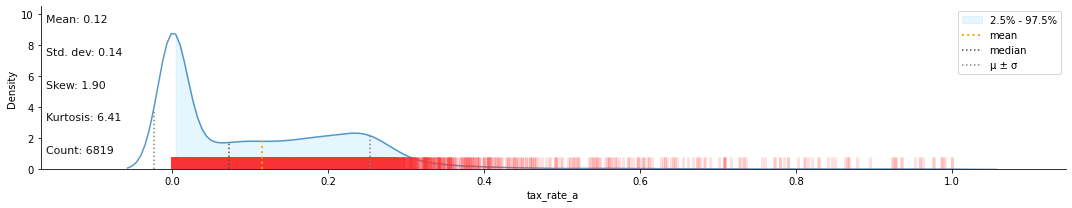

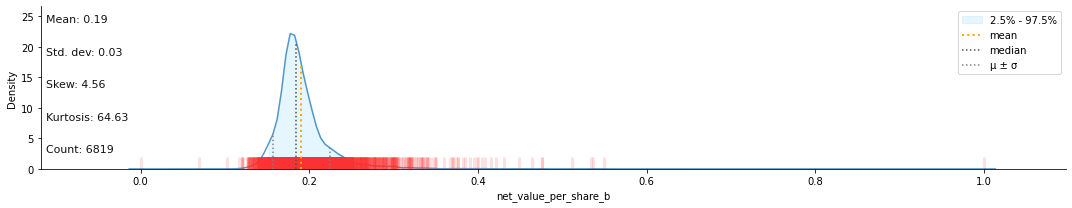

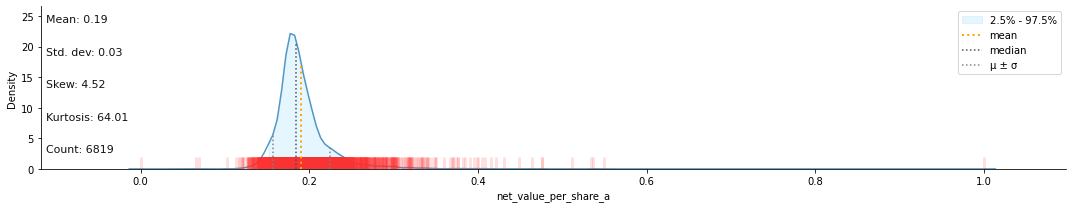

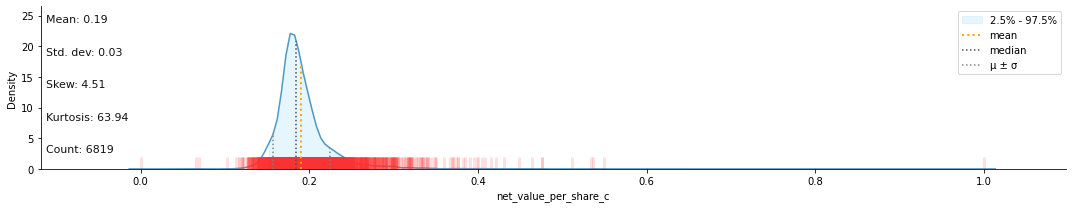

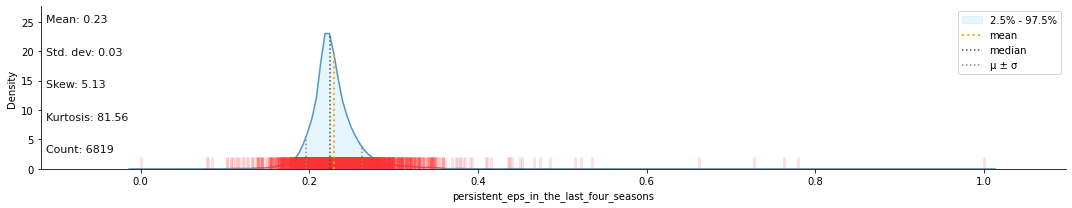

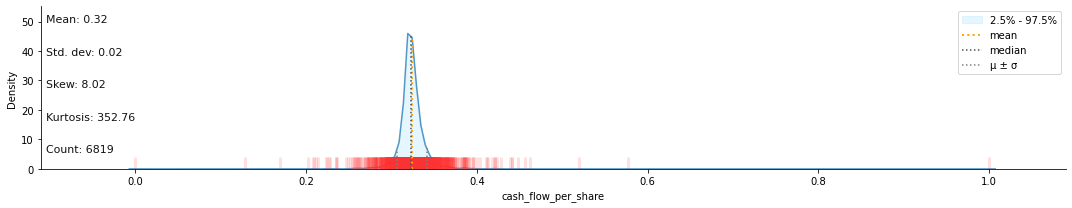

In [7]:
klib.dist_plot(df_clean)

In [ ]:
report = sv.analyze(df_clean)

report.show_html("EDA Report")

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   bankrupt                                                6819 non-null   int8   
 1   roa_c_before_interest_and_depreciation_before_interest  6819 non-null   float32
 2   roa_a_before_interest_and_percent_after_tax             6819 non-null   float32
 3   roa_b_before_interest_and_depreciation_after_tax        6819 non-null   float32
 4   operating_gross_margin                                  6819 non-null   float32
 5   realized_sales_gross_margin                             6819 non-null   float32
 6   operating_profit_rate                                   6819 non-null   float32
 7   pre_tax_net_interest_rate                               6819 non-null   float32
 8   after_tax_net_interest_rate           

Checking the imbalanced data

In [23]:
df_clean['bankrupt'].value_counts()

0    6599
1     220
Name: bankrupt, dtype: int64

Over Sampling Method for Imbalanced Target Variable


*   As the Target Variable i.e Bankrupt? contains less no of companies goes bankrupt i.e no of 1 is less as compared to 0. This is where we use oversampling method to make this two classes balanced,



In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
X = df_clean.drop('bankrupt', axis = 'columns')
y = df_clean['bankrupt']

In [26]:
smote = SMOTE(sampling_strategy='minority')
X,y= smote.fit_resample(X,y)

In [27]:
X.shape

(13198, 94)

In [28]:
y.value_counts()

1    6599
0    6599
Name: bankrupt, dtype: int64

As you see the dependent variable i.e Bankrupt? variable is balanced, now you can perform data preprocessing step

#Part 2 : Data Preprocessing

Spliting the data into training and test set 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Part 3 : Model Building


> List of the models which I'm going used :



*   XGBoost
*   Logistic Regression
* Deep Neural Network
* Random Forest Classification
* K-Nearest Neighbours













XGBoost

In [31]:
from xgboost import XGBClassifier
model_1 = XGBClassifier()
model_1.fit(X_train, y_train)

XGBClassifier()

Testing the Model on Test Set

In [32]:
y_pred = model_1.predict(X_test)

Evaluating the Model

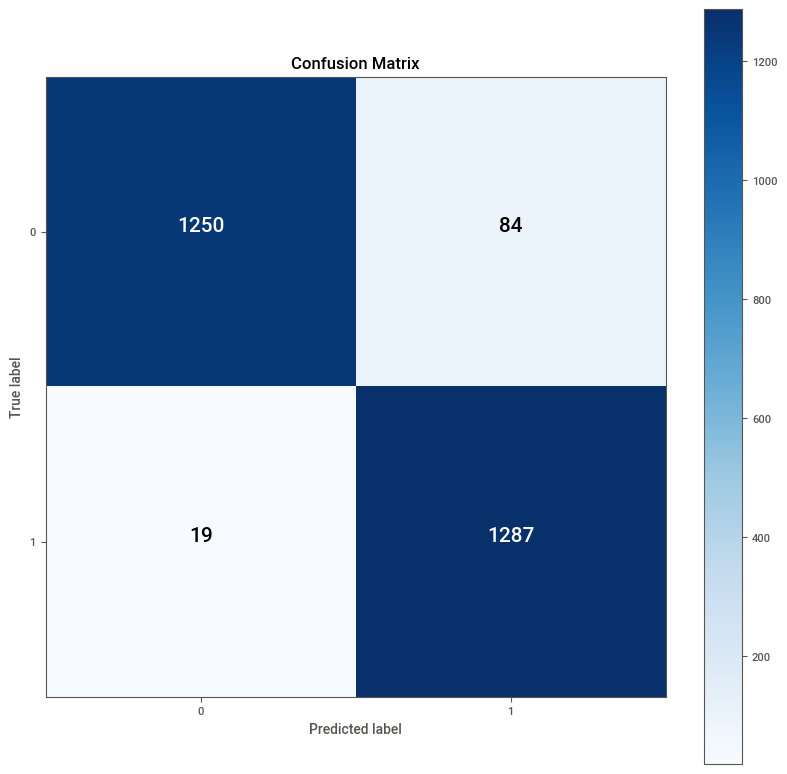

In [33]:
make_confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
xgboost = calculate_results(y_test, y_pred)

Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [35]:
y_pred = model_2.predict(X_test)

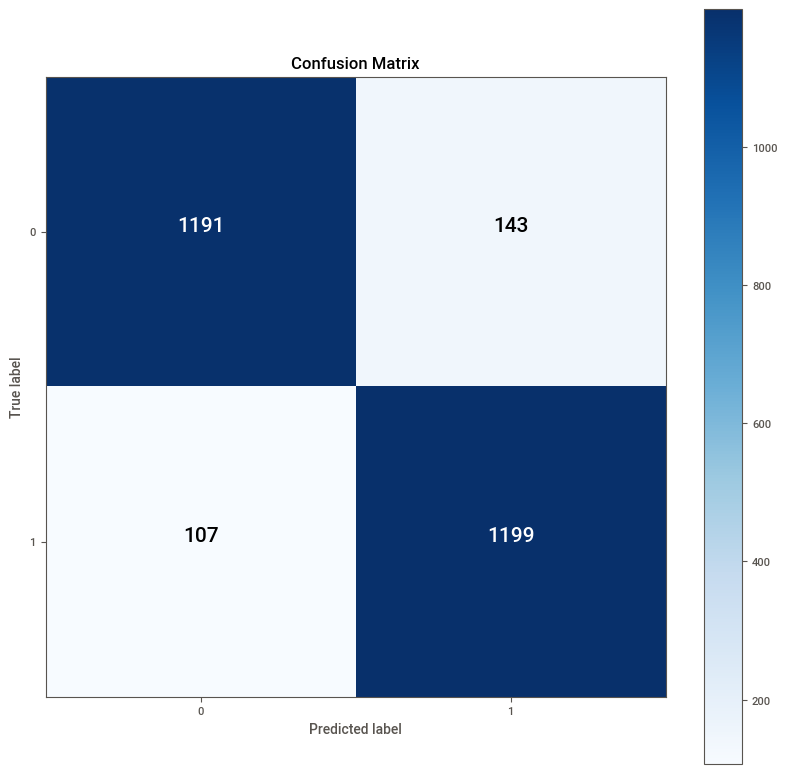

In [36]:
make_confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
logistic = calculate_results(y_test, y_pred)

Deep Neural Network (DNN)

In [37]:
model_3 = tf.keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation = 'sigmoid')

])

model_3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
history = model_3.fit(X_train, y_train, validation_split = 0.2, epochs = 20)

Epoch 1/20
264/264 [==============================] - 4s 4ms/step - loss: 0.2619 - accuracy: 0.9029 - val_loss: 0.1578 - val_accuracy: 0.9418
Epoch 2/20
264/264 [==============================] - 1s 4ms/step - loss: 0.1393 - accuracy: 0.9518 - val_loss: 0.1154 - val_accuracy: 0.9602
Epoch 3/20
264/264 [==============================] - 1s 4ms/step - loss: 0.0964 - accuracy: 0.9677 - val_loss: 0.0743 - val_accuracy: 0.9763
Epoch 4/20
264/264 [==============================] - 1s 4ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.0917 - val_accuracy: 0.9688
Epoch 5/20
264/264 [==============================] - 1s 4ms/step - loss: 0.0438 - accuracy: 0.9872 - val_loss: 0.0721 - val_accuracy: 0.9811
Epoch 6/20
264/264 [==============================] - 1s 4ms/step - loss: 0.0269 - accuracy: 0.9923 - val_loss: 0.0781 - val_accuracy: 0.9806
Epoch 7/20
264/264 [==============================] - 1s 4ms/step - loss: 0.0260 - accuracy: 0.9927 - val_loss: 0.0845 - val_accuracy: 0.9811
Epoch 

Ploting loss and accuracy curves to check model performance

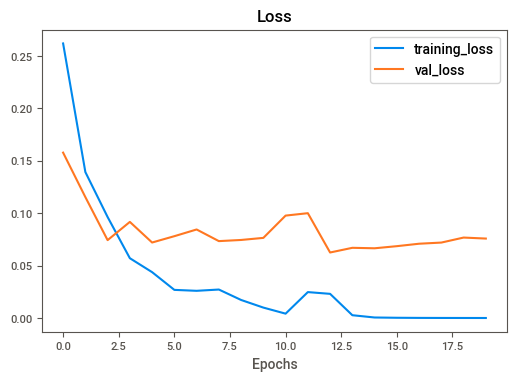

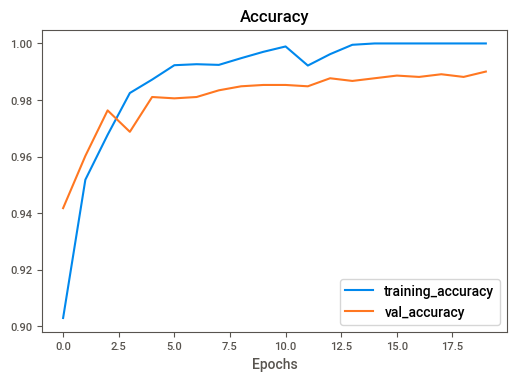

In [39]:
plot_loss_curves(history)

In [40]:
y_probs = model_3.predict(X_test)
y_pred = tf.round(y_probs)

83/83 [==============================] - 0s 2ms/step


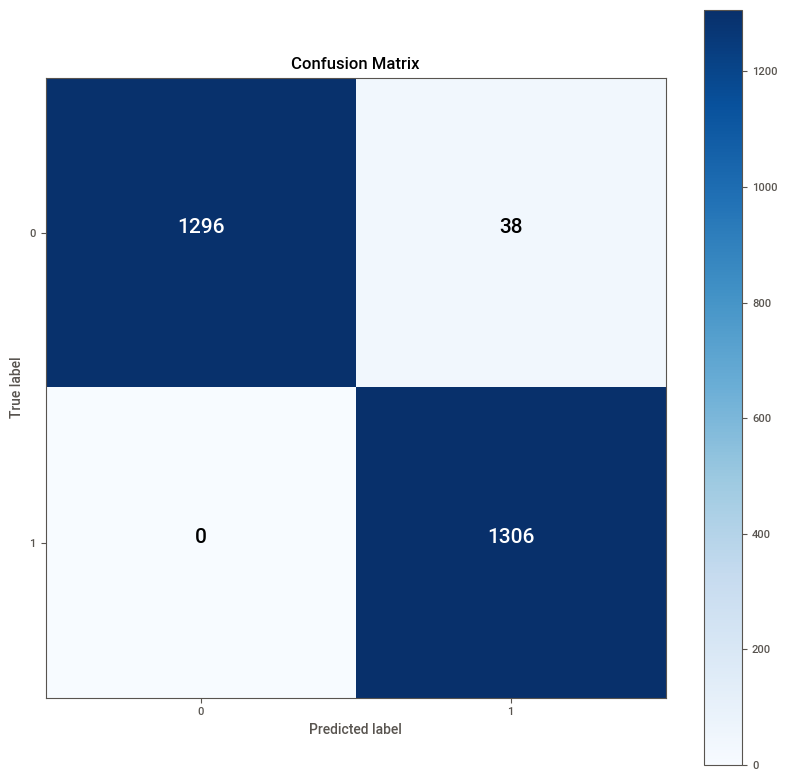

In [41]:
make_confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
dnn = calculate_results(y_test, y_pred)

In [42]:
model_3.save("dnn best model.h5")

Random Forest Classification

In [43]:
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 42)
model_4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [44]:
y_pred = model_2.predict(X_test)

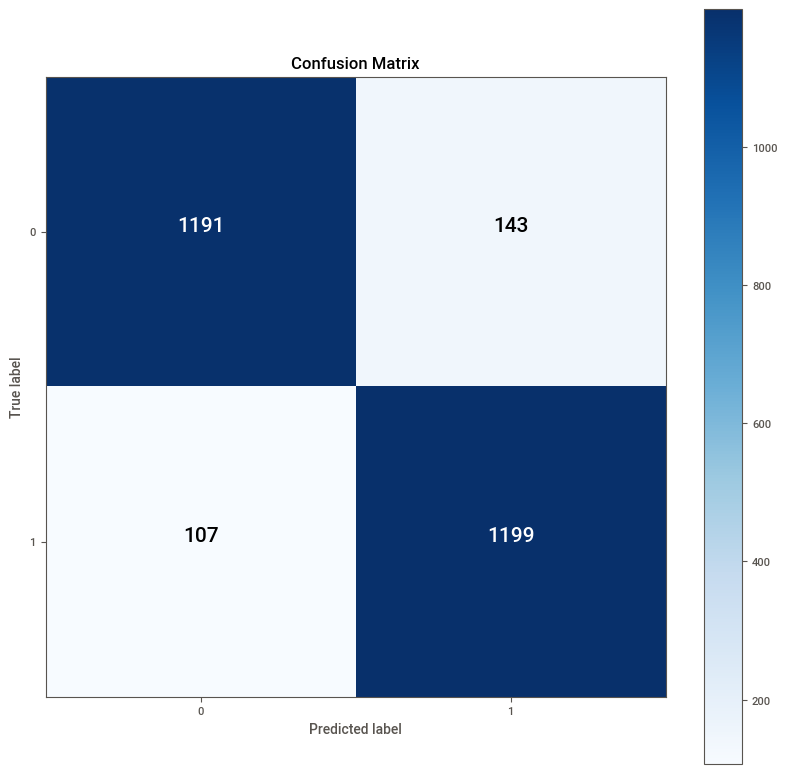

In [45]:
make_confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
rf = calculate_results(y_test, y_pred)

K-Nearest Neighbor

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model_5 = KNeighborsClassifier()
model_5.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred = model_5.predict(X_test)

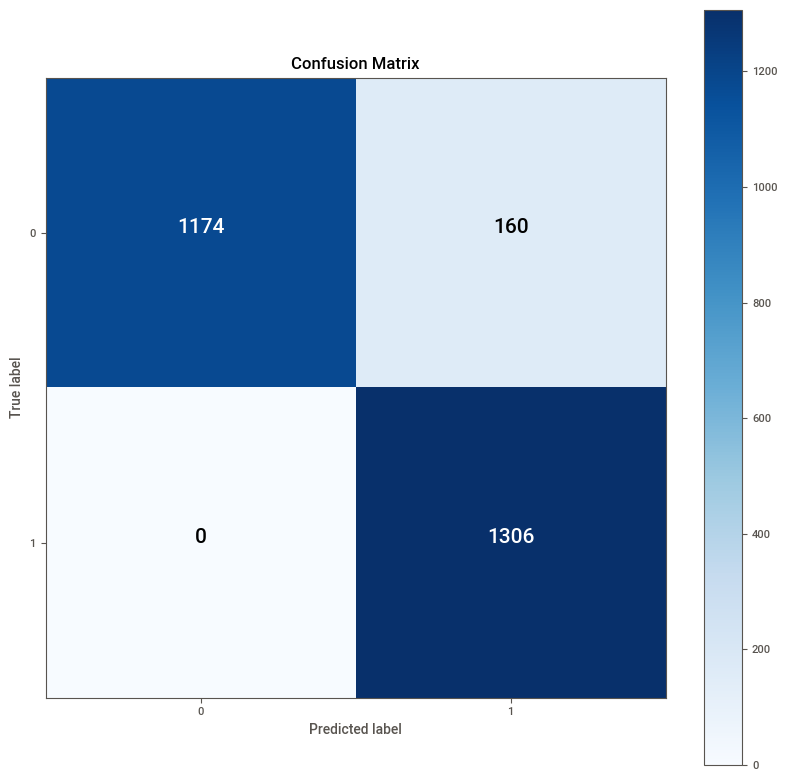

In [48]:
make_confusion_matrix(y_test, y_pred)

In [49]:
knn = calculate_results(y_test, y_pred)

Creating a dataframe to check which model have performed better

In [50]:
model_perf = pd.DataFrame({"XGBoost":xgboost,"Logistic Regression":logistic,"Deep Neural Network":dnn, "Random Forest":rf,"K nearest Neighbours":knn})

In [51]:
model_perf = model_perf.transpose()

In [52]:
# Sorting by column 'accuracy'
model_perf.sort_values(by=['accuracy'],ascending=False)

,accuracy,precision,recall,f1
Deep Neural Network,98.560606,0.986013,0.985606,0.985605
XGBoost,96.098485,0.962125,0.960985,0.960971
K nearest Neighbours,93.939394,0.946009,0.939394,0.939210
Logistic Regression,90.530303,0.905632,0.905303,0.905299
Random Forest,90.530303,0.905632,0.905303,0.905299


Well It's seems like DNN Model is a clean winner. So, this model will be our best performing model so far

#Models Performance Evaluation

Ploting and Comparing ROC Curves of Mutiple Models

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` 

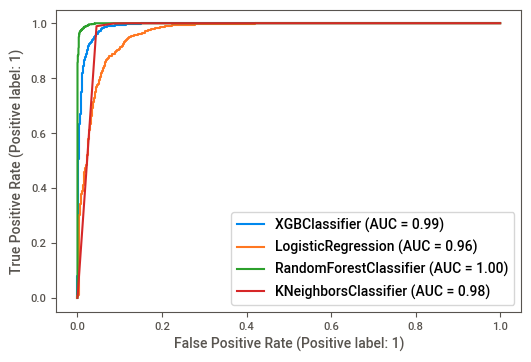

In [53]:
from sklearn.metrics import plot_roc_curve
roc = plot_roc_curve(model_1, X_test, y_test)
plot_roc_curve(model_2, X_test, y_test,ax = roc.ax_);
plot_roc_curve(model_4, X_test, y_test,ax = roc.ax_);
plot_roc_curve(model_5, X_test, y_test,ax = roc.ax_);

Sklearn can't plot this curve for DNN Model so i have used tensorflow metrics library to get auc value

In [54]:
dnn_m = tf.keras.metrics.AUC()
dnn_m.update_state(y_test, y_pred)
print("DNN Model AUC Value is :", dnn_m.result().numpy())

DNN Model AUC Value is : 0.94003
